### Introduction to data loading from external source.
Untill now we were working with a small synthetic dataset. In this notebook we will learn to load a large real-world dataset from an external filesystem and perform some exploratory data analysis on it. Make sure that you have solved the *NB1* notebook before this, because we will be using the concepts developed in it. 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for data visualizations

### Loading the dataset and viewing the first few rows

In [48]:
# pandas provides many methods to read data from external filesystems like csv, excel, json etc. 
# https://pandas.pydata.org/docs/reference/io.html
# the above link lists all the Input/Output file methods on dataframes
# for now we will use the read_csv() method to read a csv file into a dataframe

moviesData = pd.read_csv("movies.csv")

# notice the filepath which is used as an argument for read_csv() method
# if the movies.csv file was in some other folder than '1-EDA' you would give the full path

In [49]:
# remember the head() method from NB1
# we will use it to view the first 5 rows of movieData

moviesData.head() 
# not specifying the number of rows will display the top 5 rows by default

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


Before we move further take a moment to analyse the above dataset, you can easily figure out that the column

- *MOVIES*: represents the movie/show names
- *YEAR*: is the year the movie or tv show was telecast for audience
- *GENRE*: the genres to which the movie/show belongs, most valuable for recommendation system
- *RATING*: the rating audience gave to the movie or tv show
- *ONE-LINE*: a short description about movie or tv show for audiences first impression
- *STARS*: the starcast of the movie or tv show 
- *VOTES*: expresses audiences view, useful to identify impact made by the movie/show
- *Runtime*: the duration for running time of movie/show
- *Gross*: the total amount earned worldwide

### Task 1
- Print the total number of rows and columns in the movies dataset. The output should look like 
`The movies dataset has M rows and N columns` where M, N will be replaced by the actual rows and columns in the dataset.
- Display a general info showing the column names and datatypes. Comment in 2-3 lines about you observation. 

In [50]:
# Q1. 
moviesDataSet=moviesData.shape
print(f"moviesdataSet has {moviesDataSet[0]} rows and {moviesDataSet[1]} columns") 

moviesdataSet has 9999 rows and 9 columns


In [51]:
# Q2. 
print(moviesData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB
None


different columns have different dataypes, the rows gives the years and the columns displays various attributes, this info() method also gives the no of various data types.

## Checking for missing values in the dataset

In [52]:
# pandas provides a handy .isna() method to detect missing values

print(moviesData.isna())
# what you see below are boolean values indicating the data in a cell
# this is either True (present) or False (missing)

      MOVIES   YEAR  GENRE  RATING  ONE-LINE  STARS  VOTES  RunTime  Gross
0      False  False  False   False     False  False  False    False   True
1      False  False  False   False     False  False  False    False   True
2      False  False  False   False     False  False  False    False   True
3      False  False  False   False     False  False  False    False   True
4      False  False  False    True     False  False   True     True   True
...      ...    ...    ...     ...       ...    ...    ...      ...    ...
9994   False  False  False    True     False  False   True     True   True
9995   False  False  False    True     False  False   True     True   True
9996   False  False  False    True     False  False   True     True   True
9997   False  False  False    True     False  False   True     True   True
9998   False  False  False    True     False  False   True     True   True

[9999 rows x 9 columns]


In [53]:
# to convert the above data to meaningful statistic do
moviesMethods=moviesData.isna().sum()
print(moviesMethods)
# note that the sum() method adds the boolean values along the columns
# with True as 1s and False as 0s (classic boolean logic)!

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64


### Task 2
- Now that you know the number of missing values, print the percentage of missing values per column. The output should look like:
  ```
  Missing Values:

  MOVIES: L% (A)
  YEAR:   M% (B)
  .
  .
  Gross:  T% (I)
  ```
  where $A, B \dots I$ are the respective numbers, while $L, M...T$ are respective percentages of missing values for each column. You can use the previously discussed methods and concepts from NB1 for this. 

In [65]:
# Q1. 
print("Missing Values:")
moviesMethods=moviesData.isna().sum()

moviesMethod1=((9999-moviesMethods).div(9999)).mul(100).round(2)
moviesMethod1= moviesMethod1.astype(str) + '%'
moviesMethod1
#to add to a string column: ds["col"] = 'string' + ds["col"].astype(str)
#                     ds["col"] = ds["col"].astype(str) + 'string'




Missing Values:


MOVIES      100.0%
YEAR        93.56%
GENRE        99.2%
RATING       81.8%
ONE-LINE    100.0%
STARS       100.0%
VOTES        81.8%
RunTime     70.42%
Gross         4.6%
dtype: object

### Data cleaning
In this section, we will clean the data to make it suitable for our analysis. This is the most time-taking and important part of DS (typically this takes about 70% time of DS). The reason is we dont know how to clean the data and what logic to apply when cleaning the data. 
Should a particular column only contain number/string/both, can an Email column have whitespaces in between? Questions like these will always be there (some will be obvious some will be less) when you work with real-world data.  
Before we proceed, keep these things in mind:
- I will be using the string methods a lot. You will see me doing stuff like .str.replace(), .str.extract() etc. What these string methods do is replace, extract based on some string pattern, also called regex (short for regular expressions). All the dataframe string methods can be found [here]( https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html). We will be using the strip, replace, extract methods only here.
- You will also see me chaining or using methods successively. This feature is very useful in pandas as it makes your code concise. Take a note of this whenever you see this and maybe check yourself on internet what other methods can be chained in pandas.
- Focus but dont try to memorize the methods. Our main goal here is to understand how data cleaning is done. Again, google is your best freind when you dont understand the syntax or certain parameter in a method. 

In [ ]:
# lets see the data again 

moviesData.head(2)

# observe that the columns GENRE, ONE-LINE, STARS has '\n' characters
# these are new line characters which have to be removed for further data processing

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN


In [ ]:
# to remove the '\n' we can iterate over these columns and use the .str.replace() method
# we then chain a str.strip() method to strip or remove any white spaces at the end or start of the string

for column in ['GENRE', 'ONE-LINE', 'STARS']:
  moviesData[column] = moviesData[column].str.replace("\n", "", regex=True).str.strip()

# notice how I reassign the columns to themselves after the cleaning operation is done 

In [ ]:
# lets check how the data looks now

moviesData.head(2)

# you can see, we dont have '\n' in the GENRE, ONE-LINE and STARS columns

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN


In [ ]:
# lets look at the STARS column now

print(moviesData['STARS'])

0       Director:Peter Thorwarth|     Stars:Peri Baume...
1       Stars:Chris Wood, Sarah Michelle Gellar, Lena ...
2       Stars:Andrew Lincoln, Norman Reedus, Melissa M...
3       Stars:Justin Roiland, Chris Parnell, Spencer G...
4       Director:Matthias Schweighöfer|     Stars:Matt...
                              ...                        
9994    Stars:Morgan Taylor Campbell, Chris Cope, Iñak...
9995                                                     
9996    Director:Orlando von Einsiedel|     Star:Princ...
9997    Director:Jovanka Vuckovic|     Stars:Morgan Ta...
9998    Director:Jovanka Vuckovic|     Stars:Morgan Ta...
Name: STARS, Length: 9999, dtype: object


### Task 3
- Do you notice something in terms of information each entry in the STAR column has? Write your observation in max 3-4 sentences 

Q1  
your answer here

the entire details of the star column solely is printed i.e. directors and the stars in a single row, along with the sl.no.

In [ ]:
# lets now create two columns from the STAR column 
# that will contain the Directors and Stars names

# to do this we will use the .apply() method which applies a fucntion to each value in a column
# see the documentation at https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html

# function to extract director names
def getDirectors(cell):
  if 'Director' in cell:
    director = cell.split('|')[0]  # notice the director names occur before '|' so split at '|'. After the split we take the 1st element (0th idx)
    return director.split(':')[1]  # we agin split at ':' and take the 2nd element (idx 1) to get only the name
  else:                            # condition when the term 'Director' is not present we simply return an empty string
    return ''

# function to extract actor names
def getActors(cell):
  if 'Star' in cell:
    star = cell.split(':')[-1] # notice for star names we can split at ':' and take the last element (idx -1) 
    return star
  else:                       # condition when the term 'Star' is not present we simply return an empty string
    return ''

# Note: .split() method splits a string into an array at a given character 
# for eg. "Director: Steve Matt".split(':') will give the array [ "Director", " Steve Matt" ]

# now we can pass the above functions to apply method which will apply them on each entry of the column 
moviesData['Director'] = moviesData['STARS'].apply(getDirectors)
moviesData['Stars'] = moviesData['STARS'].apply(getActors)

# notice we are creating and assigning new columns at the same time.
# recall NB1 where we did mathematical operations on other columns to generate new columns

In [ ]:
# now lets view the data again
print("moviesData after extracting the Director and Star names")
display(moviesData.head())

# we can now remove the STARS column because we have its information in the Director and Stars column
print("\nmoviesData after dropping STARS column")
moviesData.drop(columns='STARS', inplace=True)
# notice the boolean inplace parameter in the drop() method. 
# This does the operation inplace meaning a copy of the dataframe is not created instead the original is modified

moviesData.head() 

moviesData after extracting the Director and Star names


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,NaN,,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...","414,849",23.0,NaN,,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,NaN,NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."



moviesData after dropping STARS column


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"17,870",25.0,NaN,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,NaN,,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"414,849",23.0,NaN,,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",NaN,NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


In [ ]:
# lets now clean the 'YEAR' column
# Observe that the YEAR column can have
# 1. A single year enclosed in () 
# 2. A single year followed by –  enclosed in ()
# 3. Two specific years with – inbetween and enclosed in ()
# 4. Other invalid or null values

moviesData['Year'] = moviesData ['YEAR'].str.extract(r"(\d{4}–.*|\d{4})")
# the above command creates a new column Year from YEAR using the .extract() method
# the parameter inside the extract() is simply a pattern to match the first 3 conditions listed above

# next we will replace the ending ")" with empty string "" followed by stripping off whitespaces at end/start
moviesData['Year'] = moviesData['Year'].str.replace(r")", "", regex=True).str.strip()
# notice how we assigned the new column Year again to itself after doing these cleaning operations

# finally we replace the ending "–" with empty string 
moviesData['Year'] = moviesData['Year'].str.replace(r"–$", "", regex=True)


# lets check how the data looks now. 
print("moveisData after cleaning the YEAR column\n")
moviesData.head(4)

moveisData after cleaning the YEAR column



,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars,Year
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",2021
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"17,870",25.0,NaN,,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",2021
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,NaN,,"Andrew Lincoln, Norman Reedus, Melissa McBride...",2010–2022
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"414,849",23.0,NaN,,"Justin Roiland, Chris Parnell, Spencer Grammer...",2013


### Task 4
- Remove the column YEAR from moviesData and print the first few rows (max 5) to check if the column was removed.

In [ ]:
# Q1  
print("\nmoviesData after dropping YEAR column")
moviesData.drop(columns='YEAR', inplace=True)
moviesData.head(5)


moviesData after dropping YEAR column


,MOVIES,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars,Year
0,Blood Red Sky,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",2021
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"17,870",25.0,NaN,,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",2021
2,The Walking Dead,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,NaN,,"Andrew Lincoln, Norman Reedus, Melissa McBride...",2010–2022
3,Rick and Morty,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"414,849",23.0,NaN,,"Justin Roiland, Chris Parnell, Spencer Grammer...",2013
4,Army of Thieves,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",NaN,NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",2021


### Data Visualization
With our data cleaned, we are ready for our first visualizations. Lets see them! 

In [ ]:
# first I will create a new dataframe from the Year column in moviesData
# here I am using .values_counts() method which gives me the counts of unique values in the Year column in a descending order
# I then chain .reset_index() and .rename() method to create a dataframe with meaninful column names  

yearCounts = moviesData['Year'].value_counts().reset_index().rename(columns = {'Year': 'Count', 'index': 'Year'})
yearCounts

,Year,Count
0,2020,1640
1,2019,1210
2,2021,1117
3,2018,876
4,2017,664
...,...,...
227,2008–2020,1
228,1984–1996,1
229,1975–1979,1
230,2002–2019,1


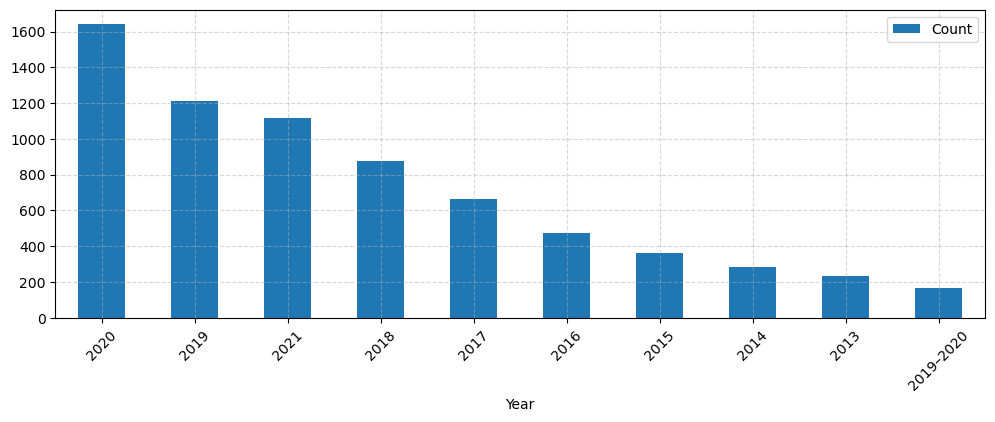

In [ ]:
# Bar plot
fig, ax = plt.subplots(figsize=(12, 4), dpi=100)

# here I am plotting the top 10 years when a most number of movie/show were released
yearCounts.head(10).plot.bar(x='Year', y='Count', ax=ax, rot=45)

plt.grid(True, alpha=0.5, ls='--')
plt.show()

# notice that in .plot.bar() method you can specify what goes on each axis by setting it to column names
# here I want the Year column on x-axis and Count on y-axis
# all other lines of code beautify the plot. You can copy these settings and start experimenting with them!  

In [ ]:
# lets now calculate some statistic on the RATING column
print("Statistics for the RATING column")

# Average Rating 
print("Mean:", round(moviesData['RATING'].mean(),2))

# Median Rating
print("Median:", moviesData['RATING'].median())

# Max Rating
print("Max:", moviesData['RATING'].max())


Statistics for the RATING column
Mean: 6.92
Median: 7.1
Max: 9.9


### Task 5
- Create a bar chart for the RATING column to show the distribution of top 5 most common ratings. You can use or copy paste the approach from yearsCount bar chart we saw above.
- Write code to calculate the average and median of the movie runtimes, upto 1 decimal place. The output should look like 
  ```
  Average movie runtime (in mins): X
  Median movie runtime (in mins): Y

  ```
  where $X,Y$ will be the calculated average and median values.

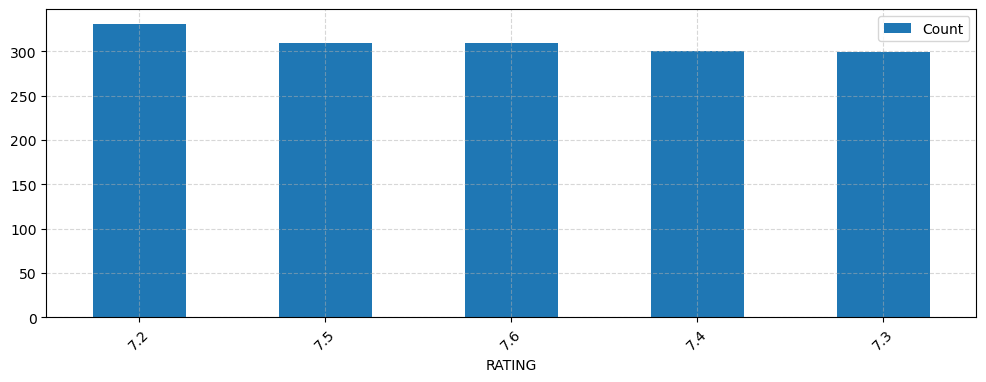

In [76]:
# Q1 
RATINGCounts = moviesData['RATING'].value_counts().reset_index().rename(columns = {'RATING': 'Count', 'index': 'RATING'})

#nds=[moviesData,yearCounts]
#nd1=pd.concat(nds)
#yearCounts = moviesData['Year'].value_counts().reset_index().rename(columns = {'Year': 'Count', 'index': 'Year'})
fig, ax = plt.subplots(figsize=(12, 4), dpi=100)
RATINGCounts.head(5).plot.bar(x='RATING', y='Count', ax=ax, rot=45)

plt.grid(True, alpha=0.5, ls='--')
plt.show()

In [59]:
# Q2  
print("Statistics for the RunTime column")

print("Average movie RunTime (in mins):", round(moviesData['RunTime'].mean(),1))
print("Median movie RunTime (in mins):", moviesData['RunTime'].median())


Statistics for the RunTime column
Average movie RunTime (in mins): 68.7
Median movie RunTime (in mins): 60.0


### notebook complete